In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import missingno as msno

In [68]:
import tensorflow as tf


In [69]:
from catboost import CatBoostRegressor

In [106]:
import category_encoders as ce

In [70]:
data = pd.read_csv('test_scores.csv')
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [71]:
data.describe()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


# Exploratory Data Analysis

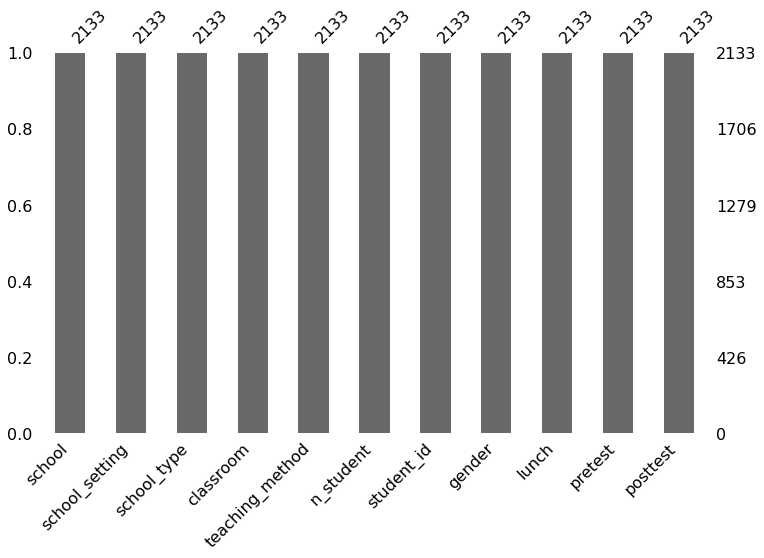

In [73]:
msno.bar(data, figsize=(12,7))
plt.show()

In [74]:
#Checking Null Values
data.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

There is no any missing data in the dataset

# checking the unique values in the dataset

In [75]:
print(data.classroom.unique())
print(data.classroom.unique().shape)

['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A93' 'TB5' 'YTB' '1UU' '4NN' 'V77' 'CII' 'Q0E' 'QA2'
 'ZBH']
(97,)


In [76]:
print(data.school.unique())
print(data.school.unique().shape)

['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
(23,)


In [77]:
data.school_type.unique()

array(['Non-public', 'Public'], dtype=object)

In [78]:
data.school_setting.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [79]:
data.teaching_method.unique()

array(['Standard', 'Experimental'], dtype=object)

In [80]:
data.lunch.unique()

array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

In [81]:
data.dtypes

school              object
school_setting      object
school_type         object
classroom           object
teaching_method     object
n_student          float64
student_id          object
gender              object
lunch               object
pretest            float64
posttest           float64
dtype: object

In [82]:
# checkign how the categorical data is distributed
for i in data.select_dtypes(include='object').columns:
    print("-----Categorical_feature----",i)
    print('\n')
    print("number of categories in "+" "+ i,len(data[i].value_counts()))
    print('\n')
    print(data[i].value_counts())   

-----Categorical_feature---- school


number of categories in  school 23


GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64
-----Categorical_feature---- school_setting


number of categories in  school_setting 3


Urban       906
Suburban    717
Rural       510
Name: school_setting, dtype: int64
-----Categorical_feature---- school_type


number of categories in  school_type 2


Public        1582
Non-public     551
Name: school_type, dtype: int64
-----Categorical_feature---- classroom


number of categories in  classroom 97


18K    31
Q0E    30
ZBH    30
QA2    30
YTB    30
       ..
IQN    15
SSP    15
KR1    15
197    14
JGD    14
Name: classroom, Length: 97, dtype: int64
-----Categorical_feature---- teaching_m

In [83]:
#dropping student_id since its id column
data=data.drop('student_id',axis=1)
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Male,Does not qualify,64.0,76.0


In [84]:

fig = px.histogram(data, x='school_setting', title="Count of Schools by School_setting", color = 'school_setting')
fig.show()

It can be observed that Maximum number schools are in urban from above graph

In [85]:
school_setting_data = pd.DataFrame(data.groupby(['school_setting'])['posttest','n_student'].mean().reset_index())
school_setting_data

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,school_setting,posttest,n_student
0,Rural,64.050980,20.015686
1,Suburban,76.037657,21.683403
2,Urban,61.748344,25.242826


In [86]:
fig = px.bar(school_setting_data, x='school_setting',y='posttest', title="School's Zone impact on test score", color = 'n_student')
fig.show()

#  Analysis

* Students from suburbans are performing well than the students from Urbans areas and rurals areas.
* Urban schools have more students than Rural and suburban this is the reason for getting less score by urban areas students

In [87]:

fig = px.histogram(data, x='gender', title="Count of Students by Gender", color = 'gender')
fig.show()

Analysis

* Both genders are equally present

In [88]:
#grouping posttest score based on teaching method
teaching_method = pd.DataFrame(data.groupby(['teaching_method'])['posttest'].mean().reset_index())
teaching_method

,teaching_method,posttest
0,Experimental,72.982895
1,Standard,63.847050


In [89]:

fig = px.histogram(data, x='teaching_method', title="Count of schools by teaching method", color = 'teaching_method')
fig.show()

Analysis

* The number of schools with experimental style are less than standard style

In [90]:
#checking posttest score based on teaching_method
fig = px.bar(teaching_method, x='teaching_method',y='posttest', title="Teaching method's impact on Test Score", color = 'posttest')
fig.show()

Analysis

* The number of schools with experimental startegy are less but the avg score of the students is more than that of the standard ones. 
* Teaching methid is an important feature for scoring good test score.

In [91]:
#calculating average posttest based on the school,school_type,teaching_method
school_data = pd.DataFrame(data.groupby(['school','school_type','teaching_method']).agg(n_students=('n_student','size'),posttest= ('posttest','mean')).reset_index())

In [92]:
school_data

,school,school_type,teaching_method,n_students,posttest
0,ANKYI,Non-public,Standard,41,71.390244
1,CCAAW,Non-public,Experimental,69,77.855072
2,CCAAW,Non-public,Standard,40,78.550000
3,CIMBB,Non-public,Experimental,17,82.588235
4,CIMBB,Non-public,Standard,57,75.263158
5,CUQAM,Public,Experimental,24,69.958333
6,CUQAM,Public,Standard,83,64.289157
7,DNQDD,Public,Experimental,48,67.520833
8,DNQDD,Public,Standard,74,65.945946
9,FBUMG,Non-public,Experimental,46,78.608696


In [93]:
fig = px.bar(school_data, x='school',y='n_students', title="Teaching method's impact on Test Score", color = 'teaching_method', hover_data=['school_type','posttest'], text = 'posttest')
fig.show()

Analysis

* There is only one school which is not supporting Experimental way of teaching and one school which is supporting only Experimental way of teaching.
* Almost all schools are supporting the Experimental way of teaching, and the results are significantly better.




In [94]:
school_type_data = pd.DataFrame(data.groupby(['lunch','school_type','school_setting']).agg(n_students=('n_student','size'),posttest= ('posttest','mean')).reset_index())
school_type_data

,lunch,school_type,school_setting,n_students,posttest
0,Does not qualify,Non-public,Rural,41,77.487805
1,Does not qualify,Non-public,Suburban,135,79.740741
2,Does not qualify,Non-public,Urban,217,79.548387
3,Does not qualify,Public,Rural,229,68.187773
4,Does not qualify,Public,Suburban,336,80.592262
5,Does not qualify,Public,Urban,257,64.077821
6,Qualifies for reduced/free lunch,Non-public,Rural,56,68.714286
7,Qualifies for reduced/free lunch,Non-public,Suburban,58,75.982759
8,Qualifies for reduced/free lunch,Non-public,Urban,44,54.454545
9,Qualifies for reduced/free lunch,Public,Rural,184,54.489130


In [95]:
fig = px.bar(school_type_data, x='lunch',y='n_students', title="School's Type impact on Test Score", color = 'school_type', hover_data=['lunch','posttest'], text = 'posttest')
fig.show()

Analysis

* Studnets who doesnt qualify for free/reduced lunch are scoring good score, may be because of better conditions

* Also students in non public schools are scoring significantly

In [96]:
fig = px.bar(school_type_data, x='school_setting',y='n_students', title="School's Zone and number of students impact on Test Score", color = 'lunch', hover_data=['school_type','posttest'], text = 'posttest')
fig.show()

Analysis

* The test score for suburban students in non public schools who doesnot qualify for free food is significantly better

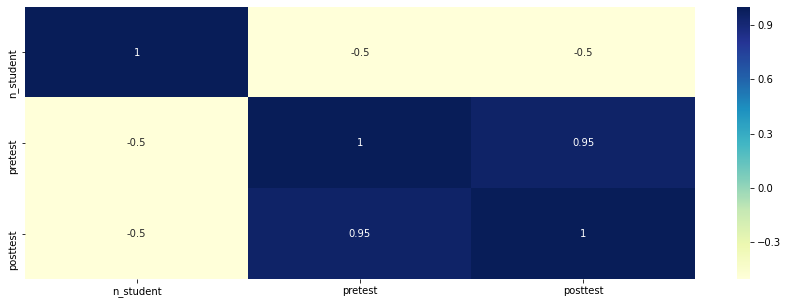

In [97]:
# plotting correlation heatmap
filtere_data=pd.DataFrame(data,columns={"n_students","posttest"})

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 5))
  
# drawing the plot
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, ax=ax)
plt.show()

# Feature Engineering

# Data Preperation

In [98]:
data.columns

Index(['school', 'school_setting', 'school_type', 'classroom',
       'teaching_method', 'n_student', 'gender', 'lunch', 'pretest',
       'posttest'],
      dtype='object')

In [99]:
#dropping gender column since it has no affect on posttest score
data=data.drop('gender',axis=1)

In [100]:
data.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,Does not qualify,64.0,76.0


In [101]:
#separating low and high cardinality features in separate dataframe
low_cardinality_features=['school_setting','school_type','teaching_method','lunch']
high_cardinality_features=['school','classroom']

In [113]:
low_cardinality_features

['school_setting', 'school_type', 'teaching_method', 'lunch']

In [114]:
low_cardinality_features_data=pd.DataFrame(data,columns={"school_setting","school_type","teaching_method","lunch"})

In [122]:
high_cardinality_features_data=pd.DataFrame(data,columns={"school","classroom"})

In [128]:
#performing one-hot encoding in low cardinality feature
low_cardinality_features_encoded_data=pd.get_dummies(data=low_cardinality_features_data,drop_first=True)

In [129]:
low_cardinality_features_encoded_data.head()

,teaching_method_Standard,lunch_Qualifies for reduced/free lunch,school_setting_Suburban,school_setting_Urban,school_type_Public
0,1,0,0,1,0
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,1,0


In [123]:
#Encoding high Cardinality variablea
encoder=ce.HashingEncoder(cols=high_cardinality_features,n_components=50)
high_cardinality_features_encoded_data=encoder.fit_transform(high_cardinality_features_data)

In [124]:
high_cardinality_features_encoded_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
low_high_combined_data=pd.concat([low_cardinality_features_encoded_data,high_cardinality_features_encoded_data],axis=1)

In [131]:
low_high_combined_data.head()

,teaching_method_Standard,lunch_Qualifies for reduced/free lunch,school_setting_Suburban,school_setting_Urban,school_type_Public,col_0,col_1,col_2,col_3,col_4,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
low_high_combined_data.columns

Index(['teaching_method_Standard', 'lunch_Qualifies for reduced/free lunch',
       'school_setting_Suburban', 'school_setting_Urban', 'school_type_Public',
       'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49'],
      dtype='object')

# Training

In [139]:
pretest__student_data=pd.DataFrame(data,columns={"pretest","n_student"})
all_training_data=pd.concat([pretest__student_data,low_high_combined_data],axis=1)

In [140]:
all_training_data.shape

(2133, 57)

In [141]:
y = data['posttest']
X = all_training_data.copy()

In [144]:
import lightgbm as lgb

/home/sakil/anaconda/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [149]:
from sklearn import metrics

In [147]:
model = lgb.LGBMRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

In [150]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predicted_y))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predicted_y))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))
print('R^2:', metrics.r2_score(y_test, predicted_y))

Mean Absolute Error (MAE): 2.400509891409466
Mean Squared Error (MSE): 9.472622056042171
Root Mean Squared Error (RMSE): 3.0777625080636373
R^2: 0.9529058621839324


In [151]:
from sklearn.tree import DecisionTreeRegressor

In [152]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [153]:
decision_tree_predictions = tree.predict(X_test)

In [154]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, decision_tree_predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, decision_tree_predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, decision_tree_predictions)))
print('R^2:', metrics.r2_score(y_test, decision_tree_predictions))

Mean Absolute Error (MAE): 3.0108090777294523
Mean Squared Error (MSE): 15.242914114318639
Root Mean Squared Error (RMSE): 3.9042174778460588
R^2: 0.9242182477279014


In [157]:
randomforest=RandomForestRegressor()
randomforest.fit(X_train,y_train)

RandomForestRegressor()

In [158]:
randomforest_prediction=randomforest.predict(X_test)

In [159]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, randomforest_prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, randomforest_prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, randomforest_prediction)))
print('R^2:', metrics.r2_score(y_test, randomforest_prediction))

Mean Absolute Error (MAE): 2.571993491903621
Mean Squared Error (MSE): 11.09537434342122
Root Mean Squared Error (RMSE): 3.3309719817826777
R^2: 0.9448381783461272


In [160]:
from sklearn.neighbors import KNeighborsRegressor

In [161]:
regressor=KNeighborsRegressor()
regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [162]:
knn_prediction=regressor.predict(X_test)

In [163]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, knn_prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, knn_prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, knn_prediction)))
print('R^2:', metrics.r2_score(y_test, knn_prediction))

Mean Absolute Error (MAE): 2.6988290398126464
Mean Squared Error (MSE): 12.100046838407492
Root Mean Squared Error (RMSE): 3.478512158726413
R^2: 0.9398433432667822


# HyperParameter

In [164]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10,1500)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [165]:
rf=RandomForestRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [166]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780}

In [167]:
rf_randomcv

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [168]:
best_random_grid=rf_randomcv.best_estimator_

In [169]:
optimized_pred=best_random_grid.predict(X_test)

In [170]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, optimized_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, optimized_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, optimized_pred)))
print('R^2:', metrics.r2_score(y_test, optimized_pred))

Mean Absolute Error (MAE): 2.343316904476867
Mean Squared Error (MSE): 9.249239132623256
Root Mean Squared Error (RMSE): 3.041256176750531
R^2: 0.9540164339051525


In [171]:
cat_model = CatBoostRegressor(loss_function='RMSE', random_state=142, verbose=50)
cat_model.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)])
pred = cat_model.predict(X_test)

Learning rate set to 0.050972
0:	learn: 13.3339527	test: 13.5875861	best: 13.5875861 (0)	total: 644ms	remaining: 10m 43s
50:	learn: 3.3955999	test: 3.5907352	best: 3.5907352 (50)	total: 700ms	remaining: 13s
100:	learn: 2.9684558	test: 3.1353142	best: 3.1352657 (99)	total: 754ms	remaining: 6.71s
150:	learn: 2.8918893	test: 3.0868213	best: 3.0868213 (150)	total: 820ms	remaining: 4.61s
200:	learn: 2.8259994	test: 3.0751813	best: 3.0739092 (198)	total: 885ms	remaining: 3.52s
250:	learn: 2.7668032	test: 3.0647998	best: 3.0630418 (230)	total: 933ms	remaining: 2.79s
300:	learn: 2.7121059	test: 3.0671098	best: 3.0630418 (230)	total: 983ms	remaining: 2.28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 3.063041795
bestIteration = 230

Shrink model to first 231 iterations.


In [172]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R^2:', metrics.r2_score(y_test, pred))

Mean Absolute Error (MAE): 2.398920624373774
Mean Squared Error (MSE): 9.382225037431828
Root Mean Squared Error (RMSE): 3.0630417949208315
R^2: 0.9533552804788258
